In [1]:
import pandas as pd

data = {
    'Duration': [30,45,20,60,35,50,40,25,55,33,38,48,22,28,44,37,29,31,52,41],
    'Body_Temp': [37.5,38.0,36.8,38.5,37.2,38.1,37.8,37.0,38.3,37.1,37.6,38.2,36.9,37.3,38.0,37.4,36.7,37.5,38.1,37.9],
    'Heart_Rate': [120,135,100,150,118,140,130,110,145,117,123,138,105,112,134,122,102,125,139,129],
    'Age': [25,30,22,28,24,27,26,23,31,29,32,26,21,25,30,28,22,24,27,29],
    'BMI': [22.4,25.1,21.8,26.5,23.0,24.2,25.0,22.0,26.0,23.3,24.5,25.3,21.5,23.1,25.6,24.0,21.7,22.6,24.8,25.2],
    'Gender': [1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1],
    'Calories': [210,320,145,420,250,375,300,180,390,240,280,365,160,190,330,270,170,225,360,310]
}

df = pd.DataFrame(data)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df.head()

,Duration,Body_Temp,Heart_Rate,Age,BMI,Gender,Calories
0,30,37.5,120,25,22.4,1,210
1,45,38.0,135,30,25.1,0,320
2,20,36.8,100,22,21.8,1,145
3,60,38.5,150,28,26.5,0,420
4,35,37.2,118,24,23.0,1,250


In [4]:
df.describe()

,Duration,Body_Temp,Heart_Rate,Age,BMI,Gender,Calories
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.150000,37.595000,124.700000,26.450000,23.880000,0.500000,274.500000
std,11.212188,0.536534,14.389689,3.186732,1.555838,0.512989,83.507012
min,20.000000,36.700000,100.000000,21.000000,21.500000,0.000000,145.000000
25%,29.750000,37.175000,115.750000,24.000000,22.550000,0.000000,205.000000
50%,37.500000,37.550000,124.000000,26.500000,24.100000,0.500000,275.000000
75%,45.750000,38.025000,135.750000,29.000000,25.125000,1.000000,337.500000
max,60.000000,38.500000,150.000000,32.000000,26.500000,1.000000,420.000000


<Axes: >

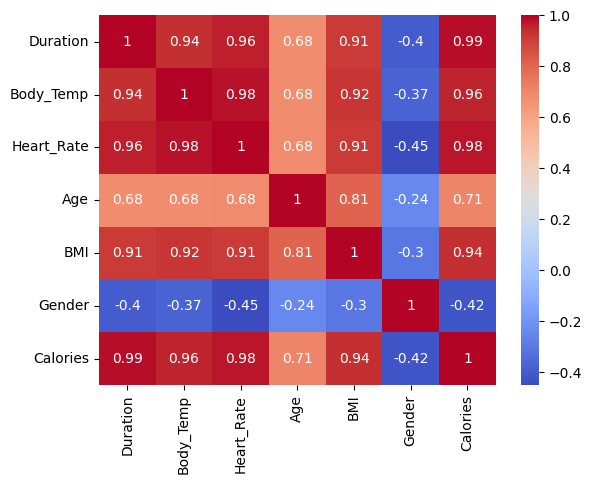

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

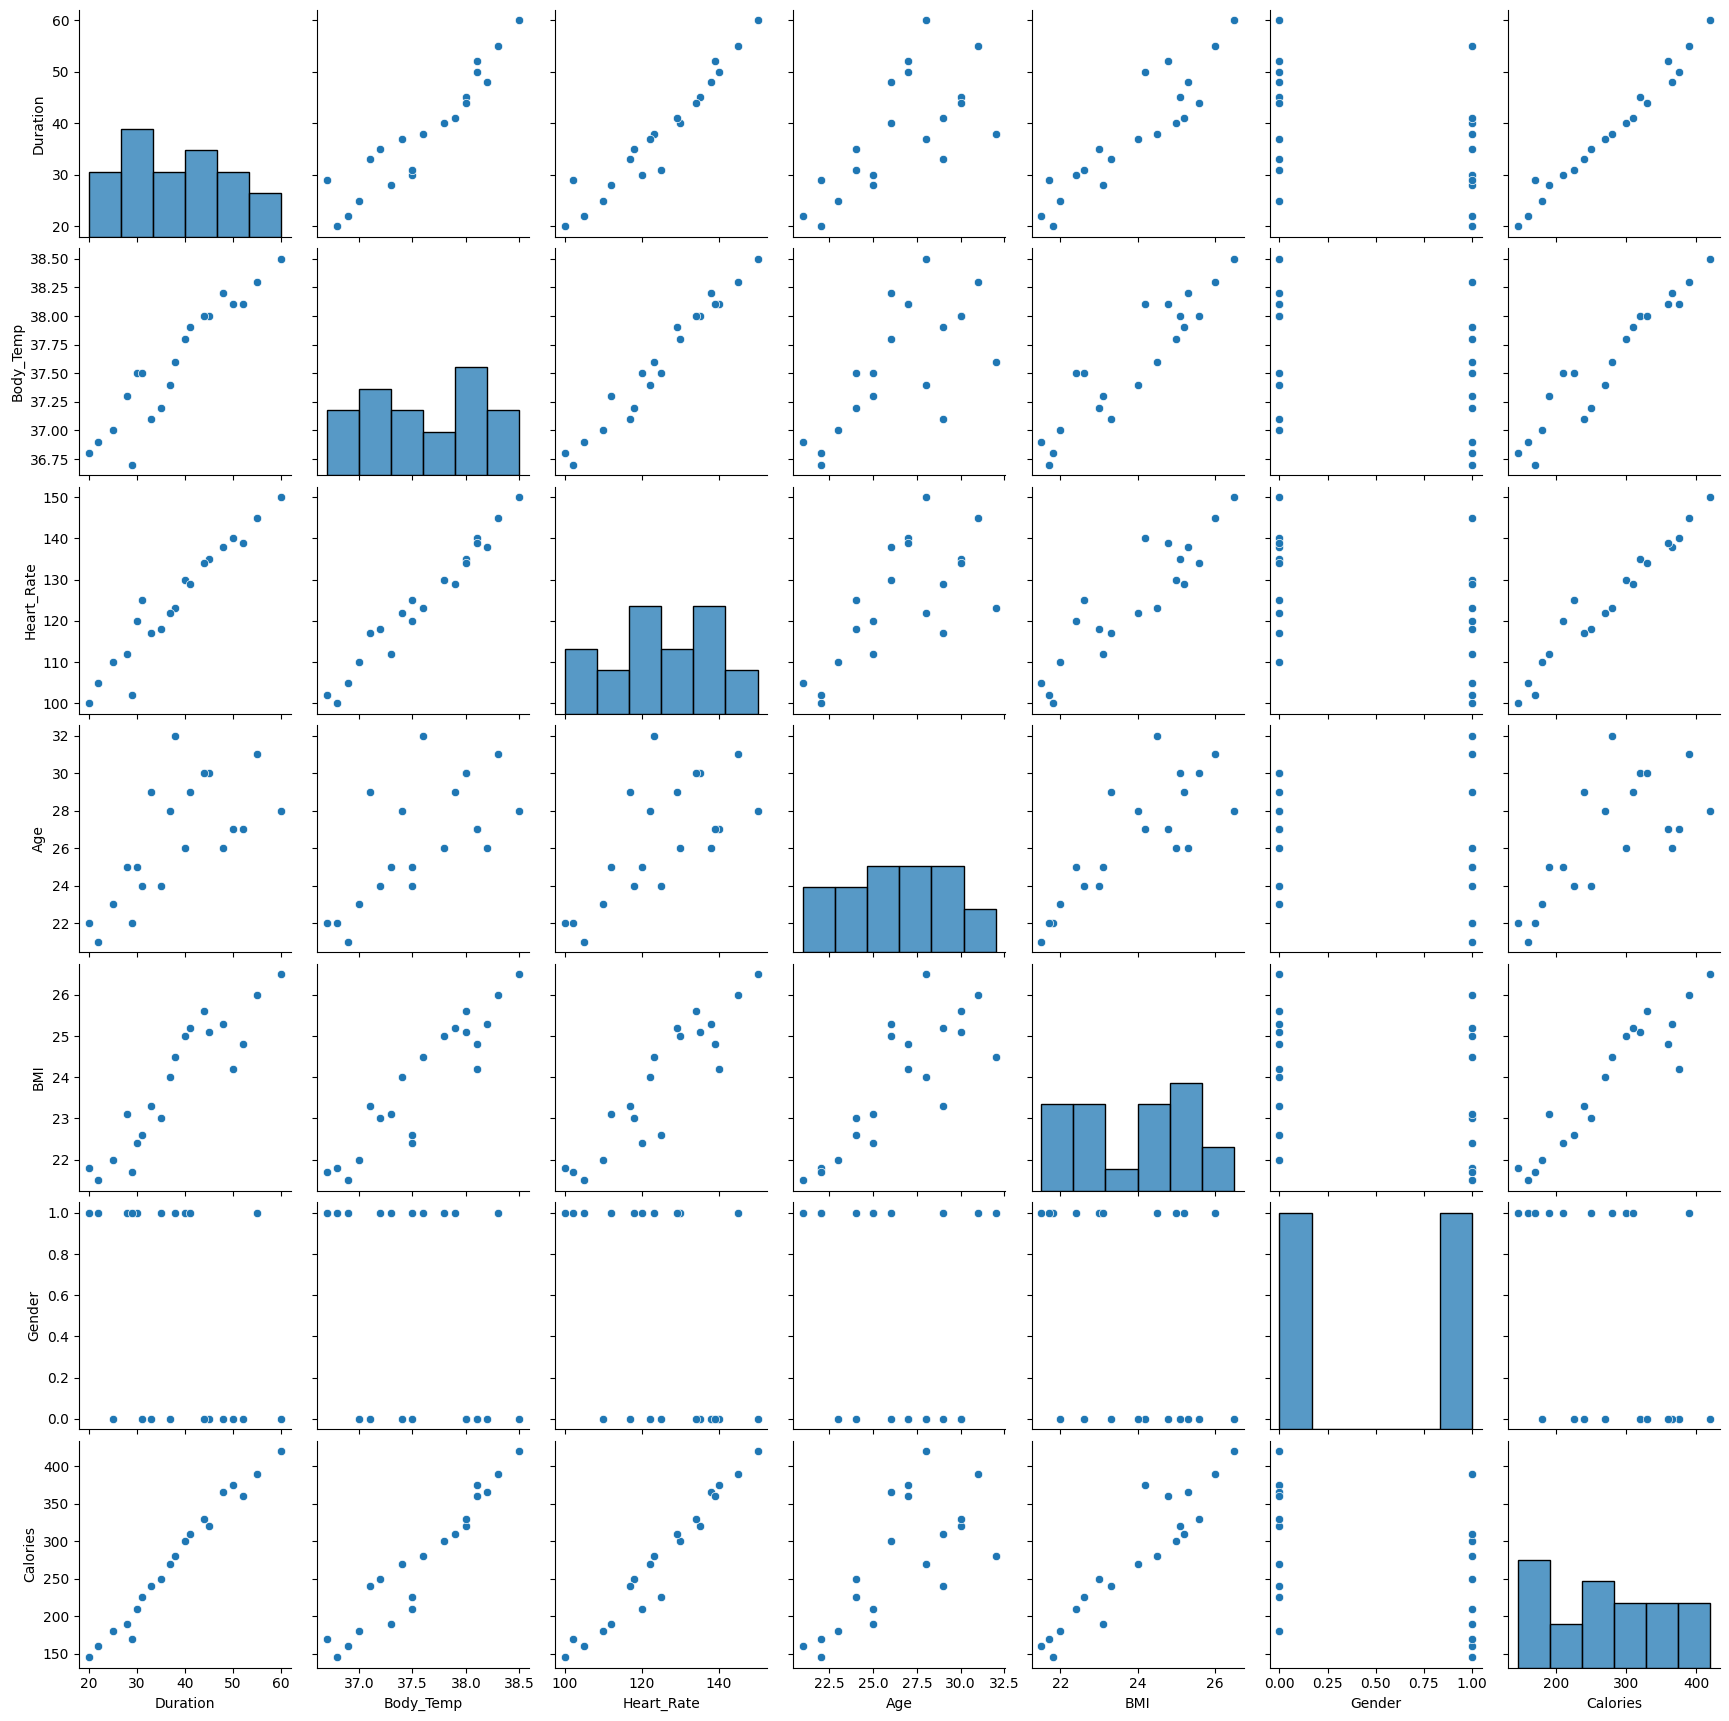

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop(['Calories', 'Gender', 'Age'], axis=1)
y = df['Calories']


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [10]:
model=LinearRegression()
model=model.fit(X_train,y_train)

In [11]:
y_pred=model.predict(X_test)

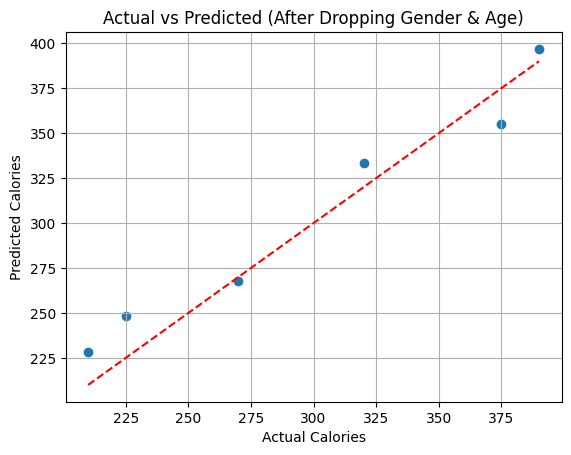

In [14]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # red dashed line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted (After Dropping Gender & Age)")
plt.grid(True)
plt.show()



In [15]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))


MAE 13.974092000641022
MSE 250.31043502609168
R2 score 0.9477309996465237


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


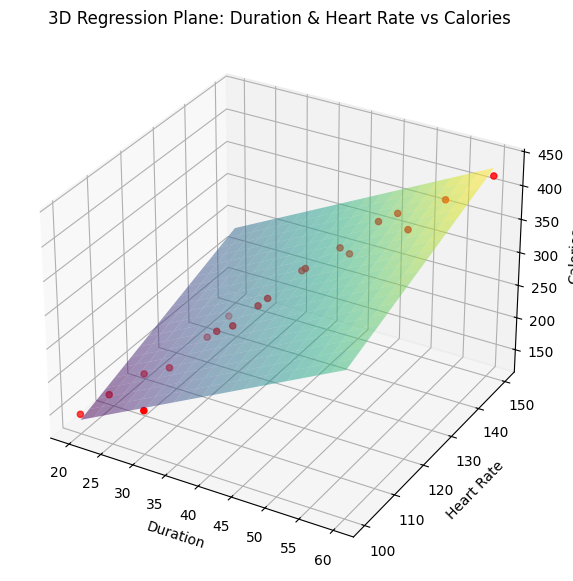

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Use your DataFrame
# Make sure df is already defined with your dataset

# Select 2 features + target
X = df[['Duration', 'Heart_Rate']]
y = df['Calories']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Create meshgrid for the 3D surface
duration_range = np.linspace(X['Duration'].min(), X['Duration'].max(), 20)
hr_range = np.linspace(X['Heart_Rate'].min(), X['Heart_Rate'].max(), 20)
duration_grid, hr_grid = np.meshgrid(duration_range, hr_range)

# Predict using the model on the grid
X_grid = np.c_[duration_grid.ravel(), hr_grid.ravel()]
calories_pred = model.predict(X_grid).reshape(duration_grid.shape)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(X['Duration'], X['Heart_Rate'], y, c='red', label='Actual')

# Plot regression surface
ax.plot_surface(duration_grid, hr_grid, calories_pred, alpha=0.5, cmap='viridis')

# Labels
ax.set_xlabel('Duration')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Calories')
ax.set_title('3D Regression Plane: Duration & Heart Rate vs Calories')

plt.show()
